In [1]:
sessions = [
    {"optimizer" : "QNGOptimizer",
     "params" : {"approx" : 'block-diag', "lam" : 0},
     "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0.5",
     "stepsizes" : [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5]},
    {"optimizer" :  "AdamOptimizer",
     "params" : {"beta1" : 0.9, "beta2" : 0.99, "epsilon" : 1.0e-8},
     "params_name" : "$\mathit{"+ chr(946) + "}_1$=0.9, $\mathit{"+ chr(946) + "}_2$=0.99, $\mathit{"+ chr(949) +"}$=$10^{-8}$",
     "stepsizes" : [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]},
    {"optimizer" :  "MomentumOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9",
     "stepsizes" : [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5]},
    {"optimizer" :  "MomentumQNGOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9, approx='block-diag', $\mathit{"+ chr(955) + "}$=0.5",
     "stepsizes" : [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,1.1,1.15]}
]

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_8244\4225223601.py:4: SyntaxWarning: invalid escape sequence '\m'
  "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0.5",
C:\Users\User\AppData\Local\Temp\ipykernel_8244\4225223601.py:8: SyntaxWarning: invalid escape sequence '\m'
  "

In [2]:
from pennylane import numpy as np
init_count = 200
steps = 200

seed_value = 736520

In [3]:
sessions_delta_energy = []
qng_quality = []
qng_stepsizes_count = len(sessions[0]["stepsizes"])
for i in range(qng_stepsizes_count):
    qng_quality.append([0]*init_count)
adam_quality = []
adam_stepsizes_count = len(sessions[1]["stepsizes"])
for i in range(adam_stepsizes_count):
    adam_quality.append([0]*init_count)
mom_quality = []
mom_stepsizes_count = len(sessions[2]["stepsizes"])
for i in range(mom_stepsizes_count):
    mom_quality.append([0]*init_count)
momqng_quality = []
momqng_stepsizes_count = len(sessions[3]["stepsizes"])
for i in range(momqng_stepsizes_count):
    momqng_quality.append([0]*init_count)

print(qng_stepsizes_count,adam_stepsizes_count,mom_stepsizes_count,momqng_stepsizes_count)

flines = open("../qng/portfolio_12_qng_delta_energy_2025-05-09.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,qng_stepsizes_count+1):
        qng_quality[j-1][i-1] = float(line[j])

flines = open("../adam/portfolio_12_adam_delta_energy_2025-05-08.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,adam_stepsizes_count+1):
        adam_quality[j-1][i-1] = float(line[j])

flines = open("../mom/portfolio_12_mom_delta_energy_2025-05-08.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,mom_stepsizes_count+1):
        mom_quality[j-1][i-1] = float(line[j])

flines = open("../momqng/portfolio_12_momqng_delta_energy_2025-05-08.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,momqng_stepsizes_count+1):
        momqng_quality[j-1][i-1] = float(line[j])

sessions_delta_energy.append(qng_quality)
sessions_delta_energy.append(adam_quality)
sessions_delta_energy.append(mom_quality)
sessions_delta_energy.append(momqng_quality)


31 51 31 24


In [4]:
sessions_steps = []
qng_steps = []
qng_stepsizes_count = len(sessions[0]["stepsizes"])
for i in range(qng_stepsizes_count):
    qng_steps.append([0]*init_count)
adam_steps = []
adam_stepsizes_count = len(sessions[1]["stepsizes"])
for i in range(adam_stepsizes_count):
    adam_steps.append([0]*init_count)
mom_steps = []
mom_stepsizes_count = len(sessions[2]["stepsizes"])
for i in range(mom_stepsizes_count):
    mom_steps.append([0]*init_count)
momqng_steps = []
momqng_stepsizes_count = len(sessions[3]["stepsizes"])
for i in range(momqng_stepsizes_count):
    momqng_steps.append([0]*init_count)

print(qng_stepsizes_count,adam_stepsizes_count,mom_stepsizes_count,momqng_stepsizes_count)

flines = open("../qng/portfolio_12_qng_steps_2025-05-09.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,qng_stepsizes_count+1):
        qng_steps[j-1][i-1] = float(line[j])

flines = open("../adam/portfolio_12_adam_steps_2025-05-08.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,adam_stepsizes_count+1):
        adam_steps[j-1][i-1] = float(line[j])

flines = open("../mom/portfolio_12_mom_steps_2025-05-08.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,mom_stepsizes_count+1):
        mom_steps[j-1][i-1] = float(line[j])

flines = open("../momqng/portfolio_12_momqng_steps_2025-05-08.dat", "r").readlines()
for i in range(0,len(flines)-1):
    line = flines[i].split()
    for j in range(1,momqng_stepsizes_count+1):
        momqng_steps[j-1][i-1] = float(line[j])

sessions_steps.append(qng_steps)
sessions_steps.append(adam_steps)
sessions_steps.append(mom_steps)
sessions_steps.append(momqng_steps)


31 51 31 24


<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_8244\408682652.py:19: SyntaxWarning: invalid escape sequence '\e'
  axs.ecdf(sessions_delta_energy[i][j],complementary=False, color=colors[j], label="$\eta$="+str(stepsize) )


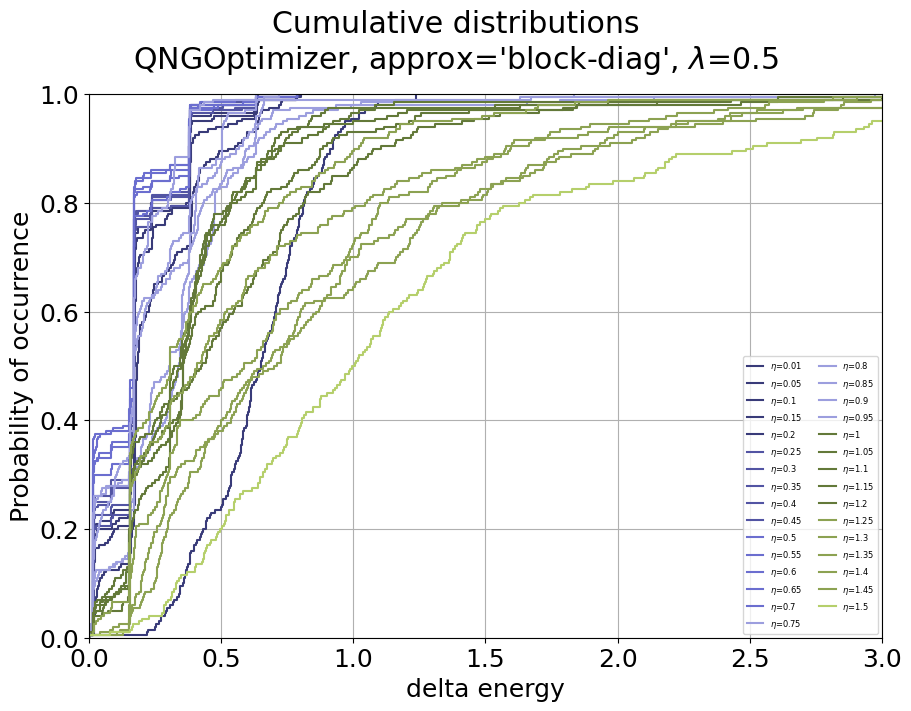

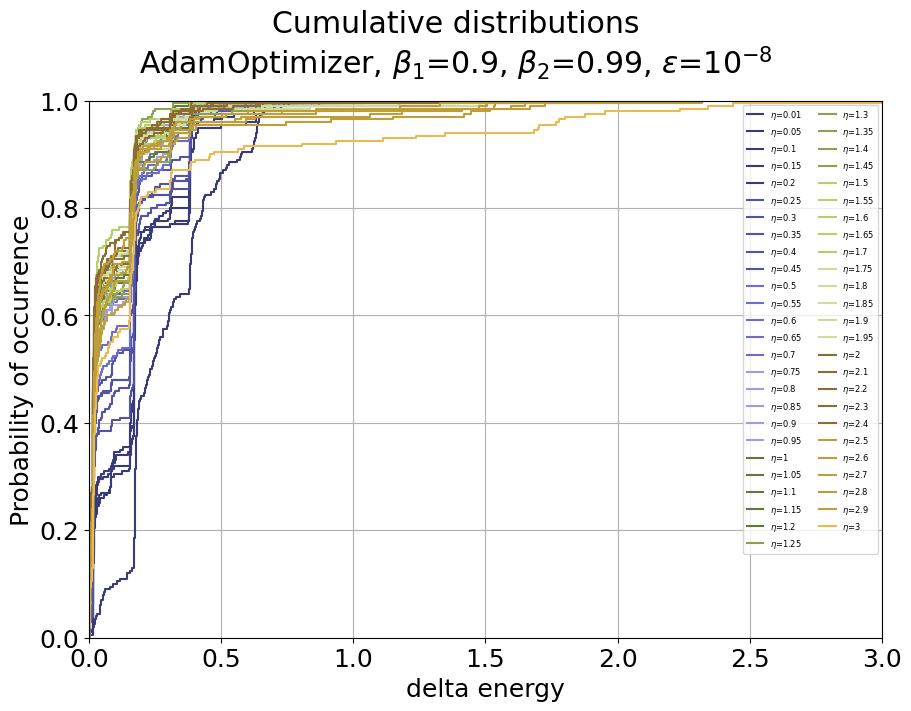

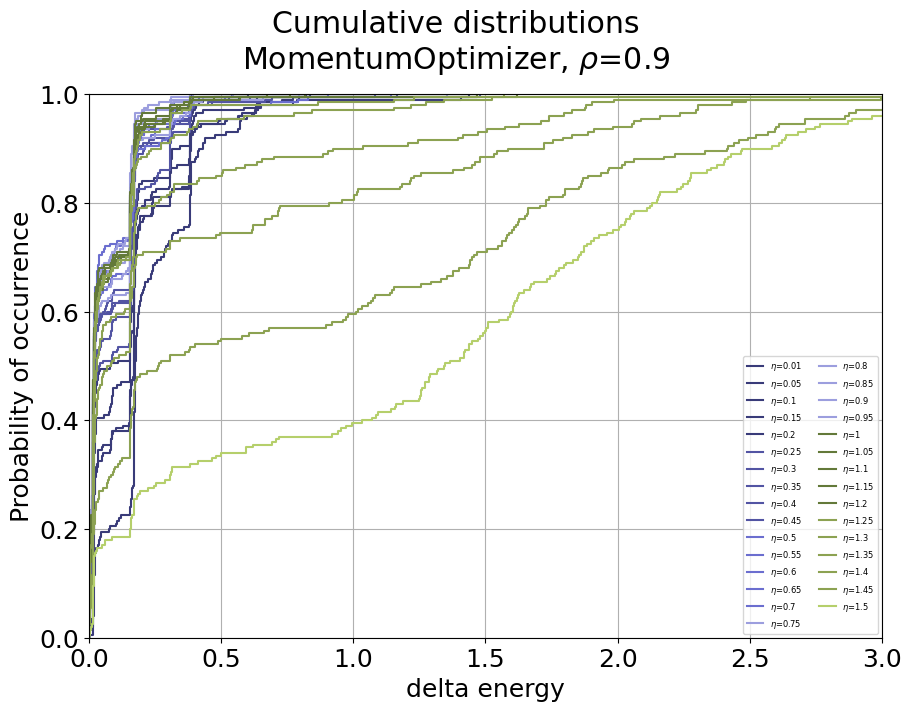

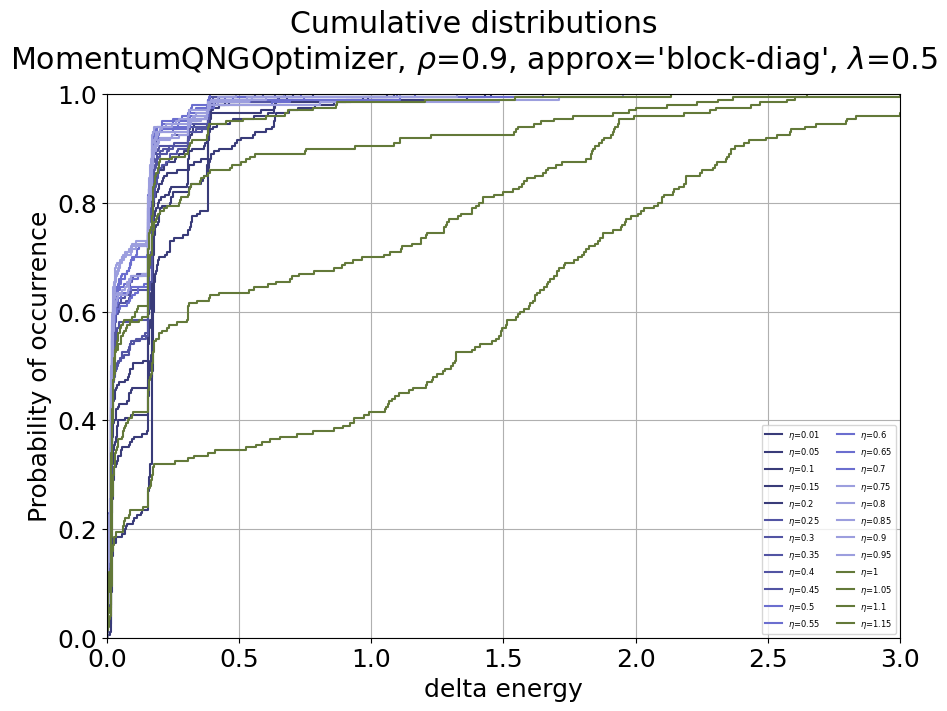

In [5]:
import matplotlib as mpl
from datetime import date
import ipynbname
from matplotlib import pyplot as plt
#ground_energy = -1.9083156
mpl.rcParams['font.size'] = 18

prefix_name =  "portfolio_12_" #ipynbname.name() + "_" + str(date.today()) + "_"

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 100))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)
    # Cumulative distributions.
    
    for j,stepsize in enumerate(session["stepsizes"]):
        axs.ecdf(sessions_delta_energy[i][j],complementary=False, color=colors[j], label="$\eta$="+str(stepsize) )
        
    # Label the figure.
    title = "Cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]
    
    fig.suptitle(title)
    
    axs.grid(True)
    axs.legend(fontsize=6,ncol=2)
    axs.set_xlabel("delta energy")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, 3)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.eps",format='eps',dpi=300)

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_8244\3927302857.py:13: SyntaxWarning: invalid escape sequence '\e'
  axs.ecdf(sessions_steps[i][j],complementary=False, color=colors[j], label="$\eta$="+str(stepsize) )


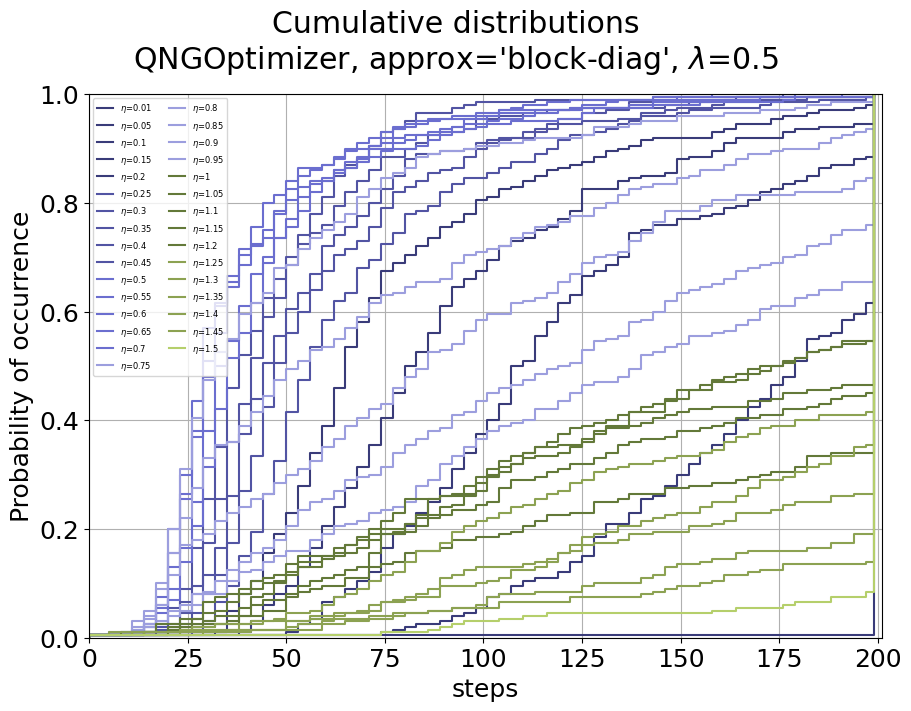

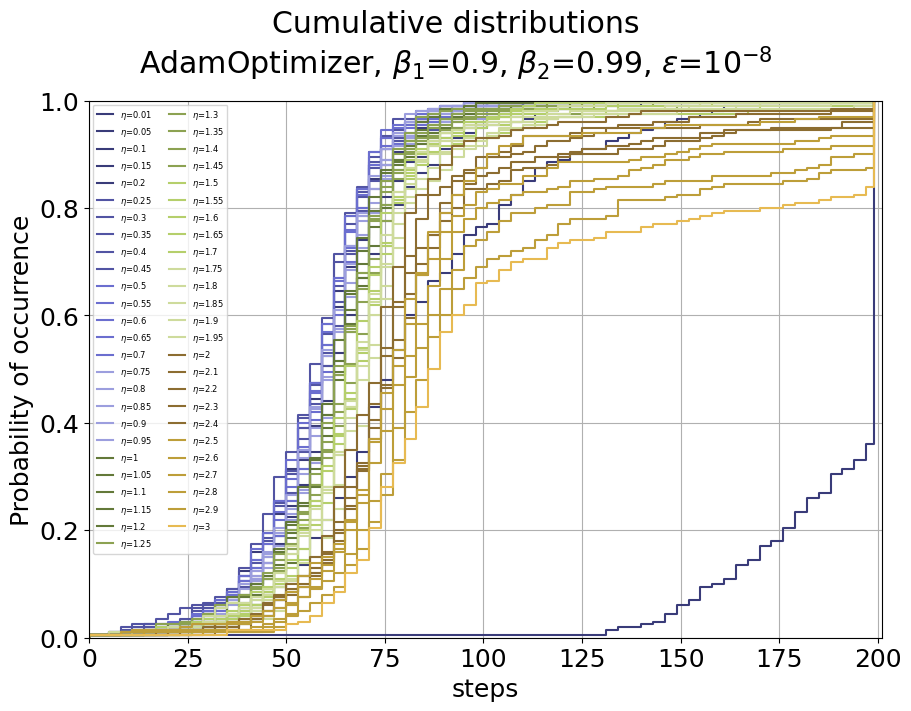

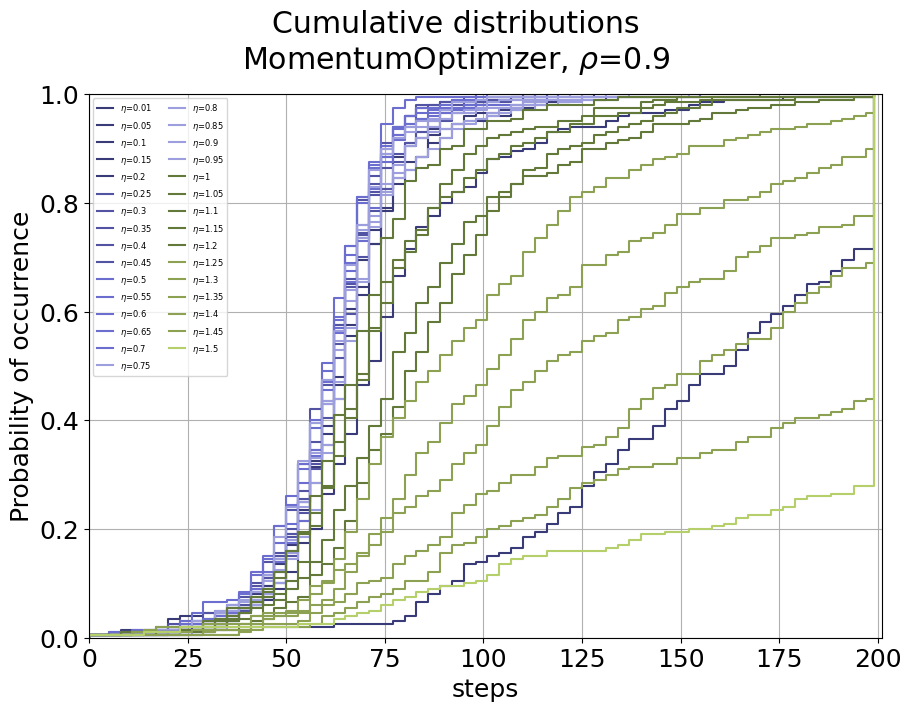

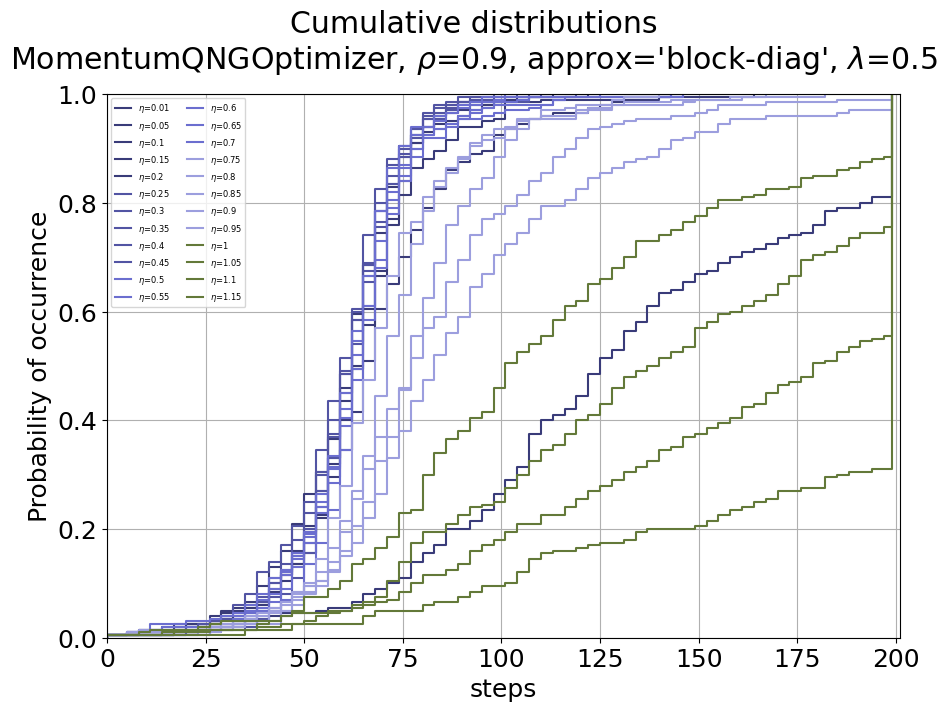

In [6]:
import matplotlib as mpl

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 100))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)
    
    # Cumulative distributions.
    
    for j,stepsize in enumerate(session["stepsizes"]):
        axs.ecdf(sessions_steps[i][j],complementary=False, color=colors[j], label="$\eta$="+str(stepsize) )
        
    # Label the figure.
    title = "Cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]
    
    fig.suptitle(title)
    
    axs.grid(True)
    axs.legend(fontsize=6,ncol=2)
    axs.set_xlabel("steps")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, steps+1)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.eps",format='eps',dpi=300)

<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:35: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:35: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_8244\1182413805.py:17: SyntaxWarning: invalid escape sequence '\e'
  axs[0][0].ecdf(sessions_delta_energy[0][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
C:\Users\User\AppData\Local\Temp\ipykernel_8244\1182413805.py:23: SyntaxWarning: invalid escape sequence '\e'
  axs[0][1].ecdf(sessions_delta_energy[1][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
C:\Users\User\AppData\Local\Temp\ipykernel_8244\1182413805.py:29: SyntaxWarning: invalid escape sequence '\e'
  axs[1][1].ecdf(sessions_delta_ener

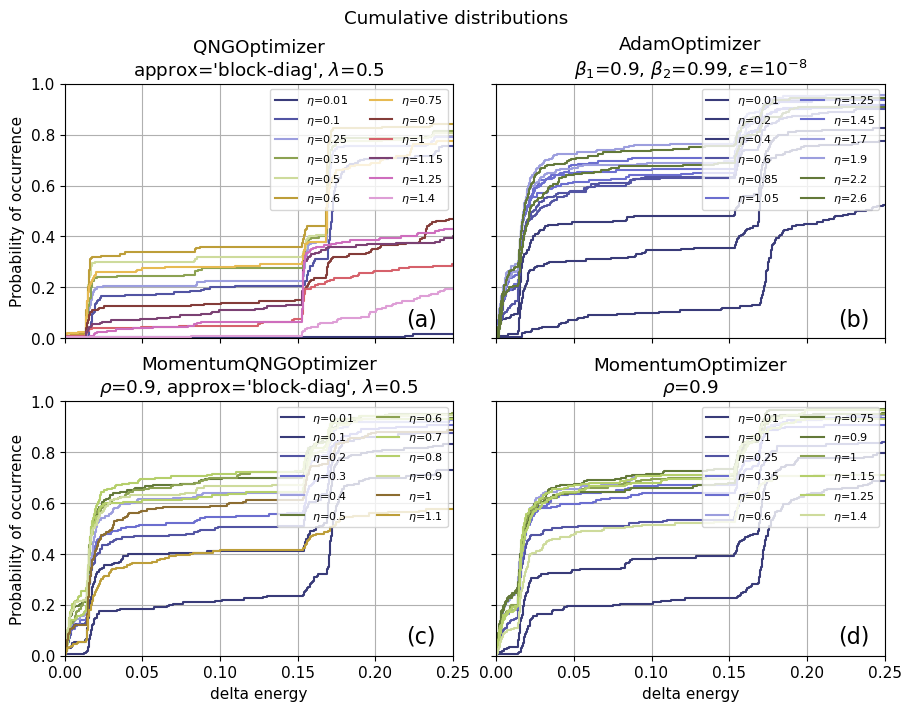

In [7]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
#colors = cmap(np.linspace(0, 1, 60))

num_lines = 12
coef = len(sessions[0]["stepsizes"])/num_lines
colors = [cmap(i) for i in np.linspace(0, 1, num_lines)]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[0]["stepsizes"][j]
    axs[0][0].ecdf(sessions_delta_energy[0][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
coef = len(sessions[1]["stepsizes"])/num_lines
colors = [cmap(i) for i in np.linspace(0, 1, len(sessions[1]["stepsizes"]))]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[1]["stepsizes"][j]
    axs[0][1].ecdf(sessions_delta_energy[1][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
coef = len(sessions[2]["stepsizes"])/num_lines
colors = [cmap(i) for i in np.linspace(0, 1, len(sessions[2]["stepsizes"]))]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[2]["stepsizes"][j]
    axs[1][1].ecdf(sessions_delta_energy[2][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
coef = len(sessions[3]["stepsizes"])/num_lines
colors = [cmap(i) for i in np.linspace(0, 1, len(sessions[3]["stepsizes"]))]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[3]["stepsizes"][j]
    axs[1][0].ecdf(sessions_delta_energy[3][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
    
session_id = [0,1,3,2]
axs[0][0].text(0.22,0.05,"(a)",fontsize=16)
axs[0][1].text(0.22,0.05,"(b)",fontsize=16)
axs[1][0].text(0.22,0.05,"(c)",fontsize=16)
axs[1][1].text(0.22,0.05,"(d)",fontsize=16)
fig.suptitle("Cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("delta energy")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, 0.25)
        axs[j][i].legend(loc="upper right",fontsize=8,ncol=2)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)
        
plt.show()
#fig.savefig(prefix_name + "delta_energy_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "delta_energy_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "delta_energy_ccdf.eps",format='eps',dpi=300)

<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\e'
<>:32: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\e'
<>:32: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_8244\3516224655.py:20: SyntaxWarning: invalid escape sequence '\e'
  axs[0][0].ecdf(sessions_steps[0][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
C:\Users\User\AppData\Local\Temp\ipykernel_8244\3516224655.py:26: SyntaxWarning: invalid escape sequence '\e'
  axs[0][1].ecdf(sessions_steps[1][j],complementary=False, color=colors[j], label=f"$\eta$={stepsize}" )
C:\Users\User\AppData\Local\Temp\ipykernel_8244\3516224655.py:32: SyntaxWarning: invalid escape sequence '\e'
  axs[1][1].ecdf(sessions_steps[2][j],complementary

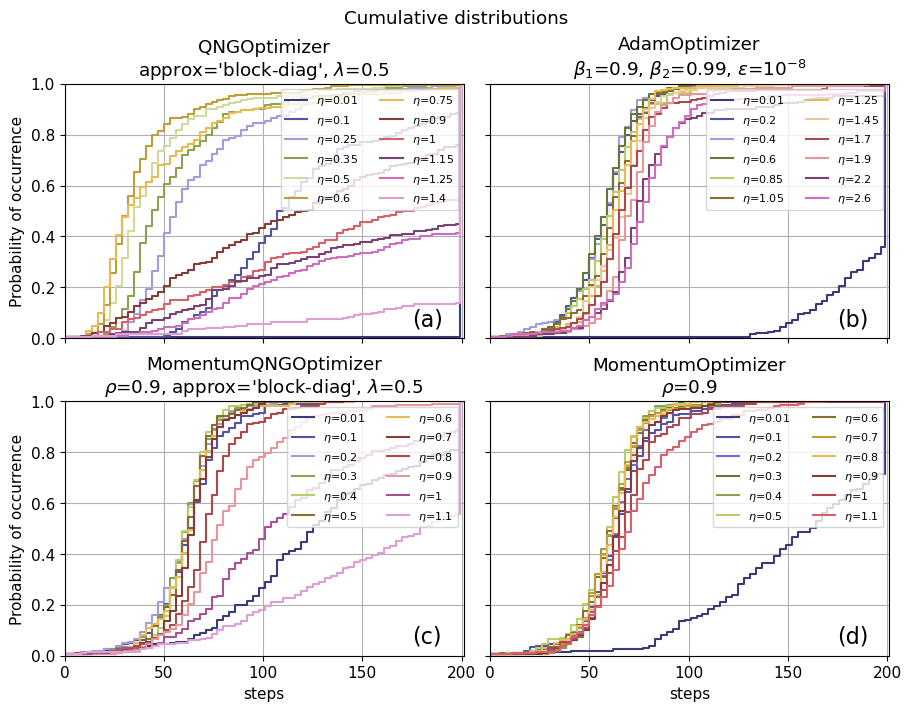

In [8]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
#cmap = mpl.colormaps['tab20b']
#colors = cmap(np.linspace(0, 1, 60))

cmap = plt.colormaps['tab20b']


num_lines = 12
coef = len(sessions[0]["stepsizes"])/num_lines
colors = [cmap(i) for i in np.linspace(0, 1, num_lines)]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[0]["stepsizes"][j]
    axs[0][0].ecdf(sessions_steps[0][j],complementary=False, color=colors[jj], label=f"$\eta$={stepsize}" )
coef = len(sessions[1]["stepsizes"])/num_lines
colors = [cmap(i) for i in np.linspace(0, 1, len(sessions[1]["stepsizes"]))]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[1]["stepsizes"][j]
    axs[0][1].ecdf(sessions_steps[1][j],complementary=False, color=colors[j], label=f"$\eta$={stepsize}" )
coef = int(len(sessions[2]["stepsizes"])/num_lines)
colors = [cmap(i) for i in np.linspace(0, 1, len(sessions[2]["stepsizes"]))]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[2]["stepsizes"][j]
    axs[1][1].ecdf(sessions_steps[2][j],complementary=False, color=colors[j], label=f"$\eta$={stepsize}" )
coef = int(len(sessions[3]["stepsizes"])/num_lines)
colors = [cmap(i) for i in np.linspace(0, 1, len(sessions[3]["stepsizes"]))]
for jj in range(num_lines):
    j = int(jj*coef)
    stepsize = sessions[3]["stepsizes"][j]
    axs[1][0].ecdf(sessions_steps[3][j],complementary=False, color=colors[j], label=f"$\eta$={stepsize}" )

session_id = [0,1,3,2]

axs[0][0].text(175,0.05,"(a)",fontsize=16)
axs[0][1].text(175,0.05,"(b)",fontsize=16)
axs[1][0].text(175,0.05,"(c)",fontsize=16)
axs[1][1].text(175,0.05,"(d)",fontsize=16)
fig.suptitle("Cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("steps")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, steps+1)
        axs[j][i].legend(loc="upper right",fontsize=8,ncol=2)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)
        
plt.show()
#fig.savefig(prefix_name + "steps_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "steps_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "steps_ccdf.eps",format='eps',dpi=300)

In [9]:
#!pip install torch

<>:42: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_8244\2408174178.py:42: SyntaxWarning: invalid escape sequence '\e'
  axs.set_xlabel(f"learning rate $\eta$",fontsize=20)


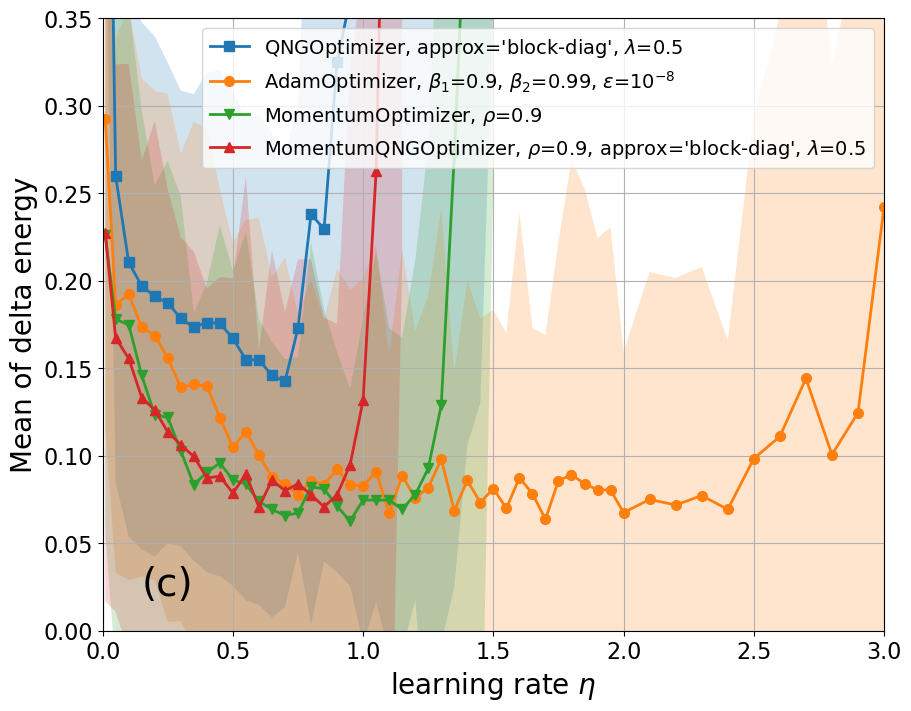

In [10]:
import matplotlib as mpl
import statistics
import math
import torch

mpl.rcParams['font.size'] = 16

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 50))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.15,0.02,"(c)",fontsize=28)
#format_plot = ["s-","o-","v-","^-"]
format_plot = ["s","o","v","^"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    ave_plus_stdev_session = []
    ave_minus_stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        delta = []
        for k in range(len(sessions_delta_energy[i][j])):
            delta.append(float(sessions_delta_energy[i][j][k]))
        ave_val = statistics.mean(delta)
        stdev_val = statistics.stdev(delta)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
        ave_minus_stdev_session.append(ave_val - stdev_val)
        ave_plus_stdev_session.append(ave_val + stdev_val)
        
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    #axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)
    axs.plot(session["stepsizes"],ave_session,label=label,marker=format_plot[i],ms=7,lw=2)
    axs.fill_between(session["stepsizes"], ave_minus_stdev_session, ave_plus_stdev_session, alpha=0.2)
  
    axs.grid(True)
    axs.legend(fontsize=14)
    axs.set_xlabel(f"learning rate $\eta$",fontsize=20)
    axs.set_ylabel("Mean of delta energy",fontsize=20)
    #axs.label_outer()
    #axs.set_xscale('log')
    axs.set_xlim(0.0, 3.)
    axs.set_ylim(0.0, 0.35)
plt.show()
fig.savefig(prefix_name+"ave_delta_energy.png",format='png',dpi=300)
fig.savefig(prefix_name+"ave_delta_energy.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"ave_delta_energy.eps",format='eps',dpi=300)

<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_8244\1496042858.py:38: SyntaxWarning: invalid escape sequence '\e'
  axs.set_xlabel(f"learning rate $\eta$",fontsize=20)


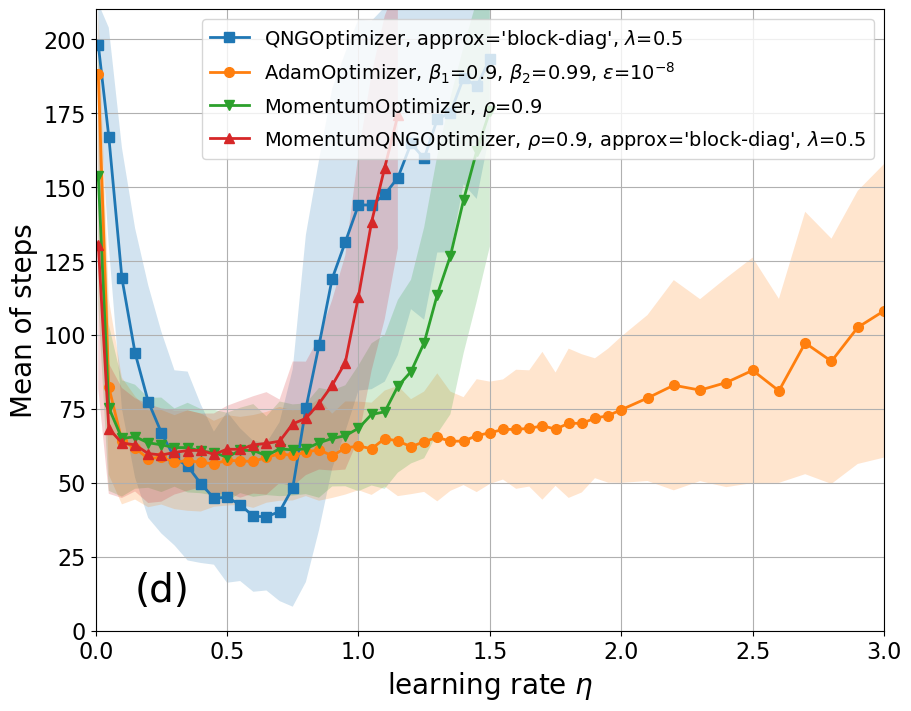

In [11]:
import matplotlib as mpl
import statistics
import math
import torch

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 50))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.15,10.0,"(d)",fontsize=28)
format_plot = ["s","o","v","^"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    ave_plus_stdev_session = []
    ave_minus_stdev_session = []    
    for j,stepsize in enumerate(session["stepsizes"]):
        arr_steps = []
        for k in range(len(sessions_steps[i][j])):
            arr_steps.append(float(sessions_steps[i][j][k]))
        ave_val = statistics.mean(arr_steps)
        stdev_val = statistics.stdev(arr_steps)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
        ave_minus_stdev_session.append(ave_val - stdev_val)
        ave_plus_stdev_session.append(ave_val + stdev_val)        
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    #axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)
    axs.plot(session["stepsizes"],ave_session,label=label,marker=format_plot[i],ms=7,lw=2)
    axs.fill_between(session["stepsizes"], ave_minus_stdev_session, ave_plus_stdev_session, alpha=0.2)
  
    axs.grid(True)
    axs.legend(fontsize=14)
    axs.set_xlabel(f"learning rate $\eta$",fontsize=20)
    axs.set_ylabel("Mean of steps",fontsize=20)
    #axs.label_outer()
    axs.set_xlim(0.0, 3.)
    axs.set_ylim(0.0, 210)
plt.show()
fig.savefig(prefix_name+"ave_steps.png",format='png',dpi=300)
fig.savefig(prefix_name+"ave_steps.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"_ave_steps.eps",format='eps',dpi=300)